In [109]:
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
kf = KFold(25, n_folds=5, shuffle=False)

print('{}     {:61} {}'.format('Iteration', 'Training set Observation', 'Testing set Observation'))
for iteration, data in enumerate(kf, start = 1):
    print('{}    {}         {}'.format(iteration, data[0], data[1]))

Iteration     Training set Observation                                      Testing set Observation
1    [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]         [0 1 2 3 4]
2    [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]         [5 6 7 8 9]
3    [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]         [10 11 12 13 14]
4    [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]         [15 16 17 18 19]
5    [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]         [20 21 22 23 24]


In [18]:
list(kf)

[(array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
         22, 23, 24]), array([0, 1, 2, 3, 4])),
 (array([ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
         22, 23, 24]), array([5, 6, 7, 8, 9])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 15, 16, 17, 18, 19, 20, 21,
         22, 23, 24]), array([10, 11, 12, 13, 14])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 20, 21,
         22, 23, 24]), array([15, 16, 17, 18, 19])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19]), array([20, 21, 22, 23, 24]))]

### Cross Validation for Parameter Tuning

In [23]:
iris = load_iris()

X  = iris.data
Y = iris.target

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn, X, Y, cv =10, scoring = 'accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [25]:
print(scores.mean())

0.9666666666666668


In [27]:
#Search for optimal value of for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv = 10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


In [29]:
max(k_scores)

0.9800000000000001

Text(0,0.5,'Cross Validated Accuracy')

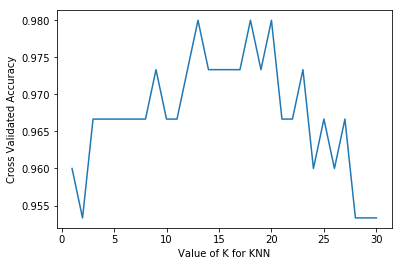

In [32]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validated Accuracy')

We will select k = 20. We need to select the model which is the simplest. In KNN, the model with higher K value is simpler than the models of lower k values. So we select k = 20.

### Cross Validation for Model Selection

We want to compare our best KNN model with Logistic Regression

In [33]:
knn = KNeighborsClassifier(n_neighbors=20)
cross_val_score(knn, X, Y, cv =10, scoring = 'accuracy').mean()

0.9800000000000001

In [36]:
logreg = LogisticRegression()
cross_val_score(logreg, X, Y, cv =10, scoring = 'accuracy').mean()

0.9533333333333334

### Cross Validation for Feature Selection

<B>Goal:</B> Select whether the Newspaper feature should be selected or not.

In [38]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col= 0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [39]:
feature_cols = ['TV', 'radio', 'newspaper']

X = data[feature_cols]
Y = data.sales

In [45]:
#Accuracy metric is only relevant for classification models
ln = LinearRegression()
scores = cross_val_score(ln, X, Y, cv = 10, scoring='mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [46]:
mse_scores = -scores
mse_scores

array([3.56038438, 3.29767522, 2.08943356, 2.82474283, 1.3027754 ,
       1.74163618, 8.17338214, 2.11409746, 3.04273109, 2.45281793])

In [48]:
#convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
rmse_scores

array([1.88689808, 1.81595022, 1.44548731, 1.68069713, 1.14139187,
       1.31971064, 2.85891276, 1.45399362, 1.7443426 , 1.56614748])

In [49]:
rmse_scores.mean()

1.6913531708051792

In [53]:
feature_cols = ['TV', 'radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(ln, X, Y, cv =10, scoring='mean_squared_error')).mean())

1.6796748419090766


# Efficiently searching for Optimal Tuning Parameters

In [62]:
k_range = range(1, 31)
print(k_range)
param_grid = dict(n_neighbors = list(k_range))
print(param_grid)

range(1, 31)
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [70]:
X = iris.data
Y = iris.target

In [71]:
grid = GridSearchCV(knn, param_grid, cv = 10, scoring ='accuracy') #n_jobs for parallel processing

In [72]:
grid.fit(X, Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [75]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [77]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.96, 0.9533333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.98, 0.9733333333333334, 0.98, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.96, 0.9666666666666667, 0.96, 0.9666666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0,0.5,'Cross-Validated Accuracy')

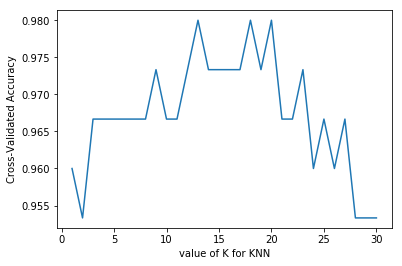

In [83]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel('value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [88]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


### Searching multiple parameters simultaneously

In [89]:
weight_options = ['uniform', 'distance']

In [93]:
param_grid = dict(n_neighbors = list(k_range), weights = weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [94]:
grid = GridSearchCV(knn, param_grid, cv = 10, scoring='accuracy')
grid.fit(X, Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [97]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [98]:
print(grid.best_params_)

{'n_neighbors': 13, 'weights': 'uniform'}


### Using the best parameters to make predictions

In [106]:
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X, Y)

knn.predict(np.array([3, 5, 4, 2]).reshape(1, 4))

array([1])

In [108]:
grid.predict(np.array([3, 5, 4, 2]).reshape(1, 4))

array([1])

### Reducing computational expense using RandomizedSearchCV

Seaching many different parametrs at once may be computationally infeasible<br>

RandomizedSearchCVsearches a subset of the parametrs and you control the computational budget

In [ ]:
rand = RandomizedSearchCV(knn, param_grid, cv  = 10, scoring='accuracy', n_iter = 10, random_state=5)

<B>Important:</B> Specifya continuous distribution (rather than list of values) fot any continuous parameters

In [111]:
rand.fit(X, Y)
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 16},
 mean: 0.96667, std: 0.03333, params: {'weights': 'uniform', 'n_neighbors': 22},
 mean: 0.98000, std: 0.03055, params: {'weights': 'uniform', 'n_neighbors': 18},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 27},
 mean: 0.95333, std: 0.04269, params: {'weights': 'uniform', 'n_neighbors': 29},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 22},
 mean: 0.97333, std: 0.04422, params: {'weights': 'uniform', 'n_neighbors': 14},
 mean: 0.97333, std: 0.04422, params: {'weights': 'distance', 'n_neighbors': 12},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 15}]

In [112]:
rand.best_params_

{'weights': 'uniform', 'n_neighbors': 18}

In [113]:
rand.best_score_

0.98

In [115]:
best_scores = []

for _ in range(20):
    rand = RandomizedSearchCV(knn, param_grid, cv =10, scoring= 'accuracy', n_iter = 10)
    rand.fit(X, Y)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)

[0.973, 0.973, 0.98, 0.98, 0.98, 0.973, 0.98, 0.973, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.973, 0.973, 0.98, 0.98, 0.973, 0.98]


# Evaluating a Classification Model 